### Student Name: Anagha Vinayak Kamat
### Student ID: 22220809
### Course Code: CT5133
### Assignment 1



#### The whole assignment is done individually by Anagha Vinayak Kamat

# PART 1: Implement Logistic Regression

## Algorithm Approach

1. In the beginning, I initiated learning_rate value (alpha value) and set iterations/ epochs to 1000. 
2. Then I created sigmoid activation function. 
3. In the fit function, I first stored the number of rows and number of columns of xtrain data in m and n variable to make further process easier. 
4. I initiated weights with np.zeros and given the shape where number of rows will be equivalent to the number of columns in xtrain data and number of columns of weights will be 1. The bias was initiated to 0. 
5. I ran a loop for total number of iterations and performed forward propagation, backward propagation, weights update part in it.
6. During forward propagation phase, I first implemented the linear regression formula and later I applied the sigmoid activation function on it. After that, I calculated the cost or the loss function and then performed back propagation. 
7. In the back propagation phase, to obtain dw I performed dot product between xtrain data and difference of yhat and ytrain data. To obtain db, I simply calculated the sum of the difference between yhat and ytrain data.
8. Following the above step, I multiplied my derivatives of weights and derivatives of bias with learning rate and subtracted the result with latest weights and biases respectively.
9. Finally in the predict function, I set a threshold of 0.5 where values over 0.5 are considered 1 and under 0.5 are considered 0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))                                     # sigmoid activation function
                
    
    def fit(self, x, y):
        m, n = x.shape
        self.weights = np.zeros((n, 1))                                 # specify the shape of weights initially
        self.bias = 0                                                   # initiate bias as 0
        
        for i in range(self.iterations):
            # Forward propagation
            z = np.dot(x, self.weights) + self.bias                     # linear regression formula
            yhat = self.sigmoid(z)                                         # activation function
            
            # Compute cost function
            cost = (-1/m) * np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat))     # calculating loss
            
            # Backward propagation
            dw = np.dot(x.T, (yhat-y))             # obtaining derivayives of weights and biases using gradient descent
            db = np.sum(yhat-y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw                    
            self.bias -= self.learning_rate * db

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        yhat = self.sigmoid(z)
        predictions = [1 if i > 0.5 else 0 for i in yhat]     # specifying a threshold value
        return predictions

In [3]:
def f1_score(y, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for true, pred in zip(y, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    accuracy = (tp + tn)/ (tp + tn + fp + fn)
    return accuracy

# Part 2: Easy Tasks

In [4]:
data1 = pd.read_csv('blobs400.csv')

train1 = data1[['X1', 'X2', 'X3']]
test1 = data1[['Class']]

x_train1, x_test1, y_train1, y_test1 = train_test_split(train1, test1,
    test_size=0.3, shuffle = True, random_state = 8)

x_test1, x_val1, y_test1, y_val1 = train_test_split(x_test1, y_test1, 
    test_size=0.5, random_state= 8, shuffle = True)

x_train1 = normalize(x_train1)
x_test1 = normalize(x_test1)
x_val1 = normalize(x_val1)
y_train1 = normalize(y_train1)
y_test1 = normalize(y_test1)
y_val1 = normalize(y_val1)

model1 = LogisticRegression()
model1.fit(x_train1, y_train1)
y_pred1 = model1.predict(x_test1)

acc1 = f1_score(y_test1, y_pred1)
acc1

0.9166666666666666

In [5]:
data2 = pd.read_csv('moons500.csv')

train2 = data1[['X1', 'X2']]
test2 = data1[['Class']]

x_train2, x_test2, y_train2, y_test2 = train_test_split(train2, test2,
    test_size=0.3, shuffle = True, random_state = 8)

x_test2, x_val2, y_test2, y_val2 = train_test_split(x_test2, y_test2, 
    test_size=0.5, random_state= 8, shuffle = True)

x_train2 = normalize(x_train2)
x_test2 = normalize(x_test2)
x_val2 = normalize(x_val2)
y_train2 = normalize(y_train2)
y_test2 = normalize(y_test2)
y_val2 = normalize(y_val2)


model2 = LogisticRegression()
model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)

acc2 = f1_score(y_test2, y_pred2)
acc2

0.85

<Figure size 2880x1440 with 0 Axes>

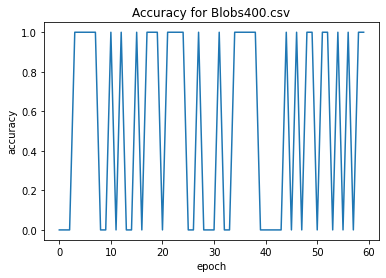

<Figure size 2880x1440 with 0 Axes>

In [6]:
plt.subplot(1,1,1)
plt.plot(y_pred1)
plt.title('Accuracy for Blobs400.csv')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure(figsize=(40,20))

<Figure size 2880x1440 with 0 Axes>

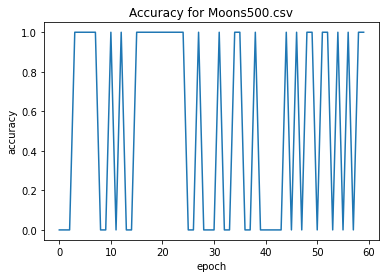

<Figure size 2880x1440 with 0 Axes>

In [7]:
plt.subplot(1,1,1)
plt.plot(y_pred2)
plt.title('Accuracy for Moons500.csv')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure(figsize=(40,20))

## Issues Faced

I tried implementing logistic regression with stochastic gradient descent but inside the for loop I was facing some issues inside the 2nd for loop where we iterate through each row. I was facing issues when the shapes of the weights would change during the back propagation due to which I couldn't implement it that way. I tried implementing multiple ways but I couldn't succeed. Although my code was working earlier without stochastic gradient descent hence, I continued with my previous code. I have attached my stochastic gradient descent code as well below.

In [8]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))                                     # sigmoid activation function
                
    
    def fit(self, x, y):
        m, n = x.shape
        self.weights = np.zeros((n, 1))                                 # specify the shape of weights initially
        self.bias = 0                                                   # initiate bias as 0
        
        for i in range(self.iterations):
            for j in range(m):
            # Forward propagation
                z = np.dot(x[j], self.weights) + self.bias                     # linear regression formula
                yhat = self.sigmoid(z)                                         # activation function

                # Compute cost function
                cost = (-1/m) * np.sum(y[j]*np.log(yhat) + (1-y[j])*np.log(1-yhat))     # calculating loss

                # Backward propagation
                dw = np.dot(x[j].T, (yhat-y[j]))             # obtaining derivayives of weights and biases using gradient descent
                db = np.sum(yhat-y[j])

                # Update weights and bias
                self.weights -= self.learning_rate * dw                    
                self.bias -= self.learning_rate * db
            
    
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        yhat = self.sigmoid(z)
        predictions = [1 if i > 0.5 else 0 for i in yhat]     # specifying a threshold value

        
        return predictions


    
model1 = LogisticRegression()
model1.fit(x_train1, y_train1)
y_pred1 = model1.predict(x_test1)
f1_score(y_test1, y_pred1)

ValueError: shapes (3,) and (1,) not aligned: 3 (dim 0) != 1 (dim 0)

# Part 3: Implement and Test a Shallow Neural Network

# Algorithm Approach

In this part, I used my previous Logistic Regression code and added one hidden layer to make it ShallowNN.
1. The very first changes I made were initiating the values of hidden_layer to 4. Here, 4 stands for hidden layer nodes. 
2. Later I created a softmax function which I used in changing weights during back propagation.
3. I one hidden layer and weights equivalent to it having the shape of array [4,2] wherw 4 is the number of nodes in the hidden layer. 
3. Finally, I carried out forward and backward propagation on all the layers, updated the weights, and calculated the cost function as well. 

In [9]:
class Shallow_NN:
    def __init__(self, learning_rate=0.01, iterations=1000, hidden_layers=4):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.hidden_layers = hidden_layers
        
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))                                     
    
    
    def softmax(self, x):
        return(np.exp(x)/np.exp(x).sum())
                
    
    def fit(self, x, y):
        
        m, n = x.shape
        w1 = np.zeros((n, 1))                                 
        b1 = np.zeros((m,1))                                                   
        w2 = np.zeros((self.hidden_layers, 1))
        b2 = np.zeros((m, 1))
        
        
        
        for i in range(self.iterations):
            # Forward propagation
            z1 = np.dot(x, w1) + b1                     
            h1 = self.sigmoid(z1)
            z2 = np.dot(h1, w2.T) + b2
            output = self.sigmoid(z2)
            
            
            # backward propagation
            dz2 = output - y
            dw2 = 1/m * np.dot(h1.T, dz2)
            db2 = 1/m * np.sum(dz2)
            dz1 = self.softmax(dz2)
            dw1 = 1/m * np.dot(x.T, dz1)
            db1 = 1/m * np.sum(dz1)
            
            # Update weights and bias
#             print(w1.shape)
            w1 -= self.learning_rate * dw1
            b1 -= self.learning_rate * db2
            w2 -= self.learning_rate * dw2
            b2 -= self.learning_rate * db2
            
            # Compute cost function
            cost = (-1/m) * np.sum(y*np.log(output) + (1-y)*np.log(1-output))
           
            
    
    def predict(self, x):
        z1 = np.dot(x, self.w1) + self.b1                     
        h1 = self.sigmoid(z1)
        z2 = np.dot(h1, self.w2) + self.b2
        output = self.sigmoid(z2)
        predictions = [1 if i > 0.5 else 0 for i in output]     

        
        return predictions

In [10]:
model3 = Shallow_NN()
model3.fit(x_train2, y_train2)
y_pred3 = model3.predict(x_test2)

f1_score(y_test2, y_pred2)

ValueError: non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,4)

## Issues Faced

Similar to the first phase where I tried implementing stochastic GD, in this phase as well I was finding issues with changing of the shape of weights during the time of back propagation. I tried my best to resolve this issue but couldn't do it. After so many unsuccessful attempts of sorting this issue, I decided to continue with the code just as it. Due to this, I couldn't check the results on the moons and blobs dataset and couldn't compare it with the Logistic Regression model. 

# Part 4: Challenging Task

For this part, I was given 2 classes of fashion products which were trousers and bag. Here, to import data, I used the code given by Prof. Micheal Madden and converted the data into training and testing set. I couldn't check the results of using this dataset in the ShallowNN model as it is not working properly.

In [11]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [12]:
(train_imgs, train_labels) = load_mnist('./fashion-mnist-data', 'train')

In [13]:
label_names = ['Trouser', 'Bag']

In [14]:
print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

# Note: you should find your images is 60000 x 784, and labels is 60000 scalars.
# There are 60,000 images, and each image is a 28x28 = 784 pixels.
# Each label is a single value corresponding to T-shirt, Trouser, etc.

Shape of images is (60000, 784), labels is (60000,)


In [15]:
def visualise(data, index):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]
    
    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28,28) 
    
    # Display it
    plt.imshow(picture, cmap='gray')
    plt.show()

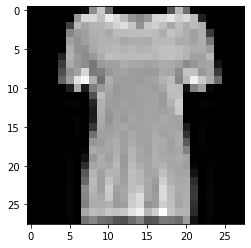

In [16]:
visualise(train_imgs, 10)

In [17]:
x_train3 = np.array([])
for i in train_imgs:
    if (train_labels == 1).all and (train_labels == 8).all:
        x_train3=train_imgs[i]
        

y_train3 = np.array([])
for i in train_imgs:
    if (train_labels == 1).all and (train_labels == 8).all:
        y_train3=train_labels[i]
        

In [18]:
(test_imgs, test_labels) = load_mnist('./fashion-mnist-data', 't10k')
print(f"Shape of images is {test_imgs.shape}, labels is {test_labels.shape}")

Shape of images is (10000, 784), labels is (10000,)


In [19]:
x_test3 = np.array([])
for i in test_imgs:
    if (test_labels == 1).all and (test_labels == 8).all:
        x_test3=test_imgs[i]
        

y_test3 = np.array([])
for i in train_imgs:
    if (test_labels == 1).all and (test_labels == 8).all:
        y_test3=test_labels[i]
        

In [20]:
model3 = Shallow_NN()
model3.fit(x_train3, y_train3)
y_pred3 = model1.predict(x_test3)
f1_score(y_test3, y_pred3)

ValueError: operands could not be broadcast together with shapes (784,4) (784,) 

# Part 5: Deep Learning Enhancement

I couldn't carry out this part due to lack of time. Although, one enhancement I could make(if I had time) along with keeping multiple hidden layers is, keeping multiple nodes in each hidden layers as well. This will help the model fit more complex functions.

# Acknowledgements

https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/ 
    
https://www.kaggle.com/code/jagannathrk/logistic-regression-from-scratch-python/notebook 
    
https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/ 
    
https://www.python-engineer.com/courses/mlfromscratch/03_logisticregression/ 
    
https://theopetunde.medium.com/a-step-by-step-tutorial-on-coding-neural-network-logistic-regression-model-from-scratch-5f9025bd3d6 
    
https://www.statology.org/f1-score-in-python/ 
    
https://www.linkedin.com/pulse/shallow-neural-network-from-scratch-deeplearningai-assignment-kim/  
    
https://www.sharpsightlabs.com/blog/numpy-softmax/ 
    
https://www.tutorialspoint.com/deep_learning_with_keras/deep_learning_with_keras_evaluating_model_performance.htm

Lectures slides of week 1 to 6 of Prof. Micheal Madden, NUIG

Load-Fashion-MNIST.ipynb file shared by Prof. Micheal Madden, NUIG